In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import csv as csv

# /Users/hayatoyamaguchi/Public/kaggle/House Price/house-prices-advanced-regression-techniques

path = "house-prices-advanced-regression-techniques/"
train_df = pd.read_csv(path+"train.csv", header=0)
test_df = pd.read_csv(path+"test.csv", header=0)
train_df['WhatIsData'] = 'Train'
test_df['WhatIsData'] = 'Test'
train_df.tail()

drop_train_df = train_df.drop('SalePrice',axis=1)
allData = pd.concat([drop_train_df,test_df],axis=0)
allData['TotalSF'] = allData['TotalBsmtSF'] + allData['1stFlrSF'] + allData['2ndFlrSF']
print(train_df.shape)
print(drop_train_df.shape)
print(test_df.shape)
print(allData.shape)
allData["LotFrontage"] = allData.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
na_col_list = allData.isnull().sum()[allData.isnull().sum()>0].sort_values(ascending=False).index.tolist()
for row in na_col_list:
    if allData[row].dtypes == "float64":
        allData[row][allData[row].isnull()] = 0
    else:
        allData[row][allData[row].isnull()] = "NA"

dropData = allData[allData.columns[allData.columns != "WhatIsData"]]

data_dummies = pd.get_dummies(dropData)
transdropData = pd.concat([dropData,data_dummies],axis=1)

transdropData = transdropData.select_dtypes(include=["float64","int64","uint8"])
transdropData = transdropData.astype('int')
a = transdropData.select_dtypes(include="object")
print(a.shape)
print(transdropData.shape)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns = transdropData.columns.values
transdropData_scaled = pd.DataFrame(scaler.fit(transdropData).transform(transdropData),columns=columns)
print(transdropData_scaled.shape)
print(allData["WhatIsData"].shape)
# transAllData = pd.concat([transdropData_scaled,allData["WhatIsData"]],axis=1)

transdropData_scaled["WhatIsData"] = list(allData["WhatIsData"])
transAllData = transdropData_scaled

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(train_df["SalePrice"])
type(np.log(train_df["SalePrice"][0]))

transAllData2 = transAllData.loc[:,~transAllData.columns.duplicated()]
print(transAllData.shape)
print(transAllData2.shape)

X_train = transAllData2[transAllData2['WhatIsData']=='Train'].drop(['WhatIsData','Id'], axis=1)
y_train = np.log(train_df["SalePrice"])
X_test = transAllData2[transAllData2['WhatIsData']=='Test'].drop(['WhatIsData','Id'], axis=1)
X_test["LotFrontage"]

(1460, 82)
(1460, 81)
(1459, 81)
(2919, 82)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(2919, 0)
(2919, 351)
(2919, 351)
(2919,)
(2919, 352)
(2919, 314)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.


1460    0.482302
1461    0.528391
1462    0.205767
1463    0.390124
1464   -1.222997
1465    0.251856
1466   -0.255125
1467   -0.301214
1468    0.712748
1469    0.021410
1470   -2.006512
1471   -2.236958
1472   -2.236958
1473   -2.098691
1474   -2.098691
1475    1.496263
1476    1.127550
1477    0.943193
1478    0.436213
1479    1.864976
1480    1.634531
1481   -1.315175
1482    1.404085
1483   -1.222997
1484   -0.116857
1485   -0.301214
1486   -0.439481
1487    0.159678
1488    1.035372
1489    0.666658
          ...   
2889   -0.900373
2890    0.251856
2891   -0.024679
2892   -0.900373
2893   -0.439481
2894   -1.315175
2895   -1.176908
2896   -0.024679
2897   -0.209035
2898    0.021410
2899    3.247651
2900    0.574480
2901    0.574480
2902    1.173639
2903    0.851015
2904    2.556314
2905    0.390124
2906   -1.315175
2907   -0.531659
2908    0.205767
2909   -2.236958
2910   -2.236958
2911    0.482302
2912   -2.236958
2913   -2.236958
2914   -2.236958
2915   -2.236958
2916    4.1694

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0),max_features=52)
select.fit(X_train,y_train)
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)
print(X_train_select.shape)
print(X_test_select.shape)

(1460, 20)
(1459, 20)


In [11]:
mask = select.get_support() #list of booleans
new_features = [] # The list of your K best features

for bool, feature in zip(mask, X_test.columns):
    if bool:
        new_features.append(feature)
new_features
X_train_drop = pd.DataFrame(X_train_select,columns=new_features)
X_test_drop = pd.DataFrame(X_test_select,columns=new_features)
X_train_drop.head()
# import matplotlib.pyplot as plt
# %matplotlib inline
# print(X_train.columns.get_loc("MSSubClass"))
# print(y_train.shape)
# plt.subplot(2,2,1)
# plt.scatter(X_train["MSSubClass"],y_train)

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageCars,GarageArea,TotalSF,MSZoning_C (all),CentralAir_N,CentralAir_Y,GarageType_Detchd
0,-0.209035,-0.217879,0.646183,-0.507284,1.046258,0.896833,0.581145,-0.934165,-0.443078,-0.773861,1.207379,0.413547,0.295002,0.307040,0.349364,0.023361,-0.092944,-0.26829,0.26829,-0.603340
1,0.482302,-0.072044,-0.063185,2.188279,0.154764,-0.395604,1.178255,-0.629284,0.477463,0.261075,-0.785025,-0.471891,0.234950,0.307040,-0.058991,-0.028762,-0.092944,-0.26829,0.26829,-0.603340
2,-0.070768,0.137197,0.646183,-0.507284,0.980221,0.848965,0.098189,-0.287999,-0.297968,-0.610718,1.235375,0.563755,0.290554,0.307040,0.627787,0.197105,-0.092944,-0.26829,0.26829,-0.603340
3,-0.439481,-0.078385,0.646183,-0.507284,-1.859351,-0.682812,-0.494529,-0.046824,-0.669812,-0.506205,0.978742,0.427382,0.283882,1.619264,0.785561,-0.092054,-0.092944,-0.26829,0.26829,1.657441
4,0.666658,0.518903,1.355551,-0.507284,0.947203,0.753229,0.469187,-0.160586,0.212184,-0.037170,1.671651,1.378042,0.288330,1.619264,1.685798,0.987641,-0.092944,-0.26829,0.26829,-0.603340


In [24]:
# plt.figure(figsize=(3,4))
# for i  in range(X_train.columns.size):
#     column = i+1
#     plt.subplot(2,156,column)
# #     plt.subplot((column/5)+1,column%5,column)
#     plt.scatter(X_train[X_train.columns[column-1]],y_train)

X_train=X_train_select
X_test=X_test_select

In [77]:
# plt.figure(figsize=(3, 4))
 
# plt.subplot(2,1,1)
# plt.plot(x, y1)
 subplot(行数, 列数, プロット番号)
# plt.subplot(2,1,2)
# plt.plot(x, y2)
X_train.columns[0]

IndentationError: unexpected indent (<ipython-input-77-0e0dc15bc8e7>, line 5)

In [44]:
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import Lasso
# from sklearn.metrics import mean_squared_error

# from sklearn.model_selection import GridSearchCV
# param_grid = {"alpha":[0.001,0.003,0.01,0.03,0.1,0.3,1]}
# lasso = Lasso()
# grid_search = GridSearchCV(lasso, param_grid)
# # , scoring = "neg_mean_squared_error"
# grid_search.fit(X_train,y_train)
# print(grid_search.best_score_)
# print(grid_search.best_params_)


# results = pd.DataFrame(grid_search.cv_results_)
# results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV
param_grid = {"alpha":[1,3,10,30,100,300]}
ridge = Ridge()
grid_search = GridSearchCV(ridge, param_grid)
# , scoring = "neg_mean_squared_error"
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)


results = pd.DataFrame(grid_search.cv_results_)
results

0.8346113640994065
{'alpha': 100}


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.002606,0.000376,0.000881,0.000120,1,{'alpha': 1},0.874236,0.846575,0.778045,0.832990,0.040422,5,0.842243,0.858566,0.878057,0.859622,0.014640
1,0.001842,0.000164,0.000729,0.000019,3,{'alpha': 3},0.874299,0.846738,0.778128,0.833092,0.040424,4,0.842214,0.858525,0.878039,0.859593,0.014645
2,0.002020,0.000169,0.000877,0.000057,10,{'alpha': 10},0.874559,0.847148,0.778427,0.833415,0.040424,3,0.842127,0.858377,0.877973,0.859492,0.014655
3,0.002269,0.000197,0.000945,0.000022,30,{'alpha': 30},0.875191,0.847753,0.779200,0.834085,0.040357,2,0.841791,0.857943,0.877761,0.859165,0.014710
4,0.002120,0.000470,0.000949,0.000040,100,{'alpha': 100},0.875442,0.847431,0.780851,0.834611,0.039661,1,0.839697,0.855857,0.876441,0.857332,0.015037
5,0.003971,0.000873,0.001791,0.000325,300,{'alpha': 300},0.870091,0.841685,0.782176,0.831351,0.036622,6,0.831781,0.848393,0.870660,0.850278,0.015928


In [79]:
lasso = Lasso(alpha=0.003).fit(X_train_train,y_train_train)
print(mean_squared_error(y_train_train ,lasso.predict(X_train_train)))
print(mean_squared_error(y_val ,lasso.predict(X_val)))

0.009090981757573622
0.04149195374881518


In [21]:
from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
time

lasso = Lasso(alpha = 0.03)
lasso.fit(X_train,y_train)
predictions = np.exp(lasso.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)

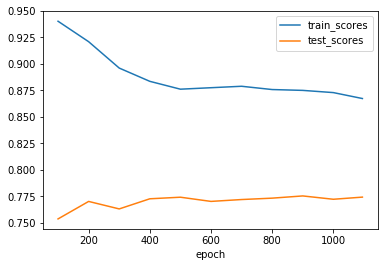

In [81]:
epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    lasso = Lasso(alpha = 0.03)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    lasso.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(lasso.score(X_train_epoch,y_train_epoch))
    test_scores.append(lasso.score(X_val,y_val))
    import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [22]:
# import xgboost as xgb
# from sklearn.cross_validation import StratifiedKFold
# from sklearn.cross_validation import train_test_split
 
# X_train,X_test,y_train,y_test = train_test_split(df_train_x,df_train_y,test_size=0.1,random_state=0)
# kfold = StratifiedKFold(y=y_train['SalePrice'].as_matrix(),n_folds=10,random_state=1)
 
# for k,(train,test) in enumerate(kfold):
#   mod = xgb.XGBRegressor(max_depth=5,min_child_weight=1,gamma=0,subsample=0.2,colsample_bytree=0.2,learning_rate=0.1)
#   mod.fit(X_train.as_matrix()[train], cv_train_y[train])
#   y_test_pred_xgb = mod.predict(X_train.as_matrix()[test])

In [30]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {"min_child_weigh":[1,2,4,7,10]}

# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]
# "max_depth":[3,4,5],"learning_rate":[0.03,0.1,0.3]
# "colsample_bytree":[0.5,0.6,0.7,0.8,0.9,1]

xgb = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
grid_search = GridSearchCV(xgb, param_grid)
# , scoring = "neg_mean_squared_error"
grid_search.fit(X_train,y_train)
print(grid_search.best_score_)
print(grid_search.best_params_)

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xg

0.8886634137070304
{'min_child_weigh': 1}


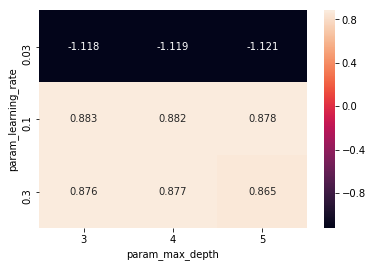

In [26]:
def plot_heatmap_from_grid(grid):
    # チューニング対象のパラメータを特定する。
    params = [k for k in grid.cv_results_.keys() if k.startswith('param_')]
    if len(params) != 2: raise Exception('grid has to have exact 2 parameters.') 

    # ヒートマップの行、列、値に使うキーを定義する。
    index = params[0]
    columns = params[1]
    values = 'mean_test_score'

    # gridから必要なキーのみを抽出する。
    df_dict = {k: grid.cv_results_[k] for k in grid.cv_results_.keys() & {index, columns, values}}

    # dictをDataFrameに変換してseabornでヒートマップを表示する。
    import pandas as pd
    df = pd.DataFrame(df_dict)
    data = df.pivot(index=index, columns=columns, values=values)
    import seaborn as sns
    sns.heatmap(data, annot=True, fmt='.3f')
plot_heatmap_from_grid(grid_search)

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and w

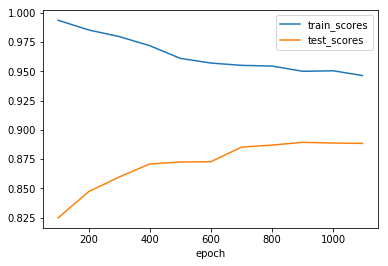

In [34]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
epochs = [100,200,300,400,500,600,700,800,900,1000,1095]
train_scores = []
test_scores = []
for epoch in epochs:
    model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree=0.6)
    X_train_epoch = X_train_train[:epoch]
    y_train_epoch = y_train_train[:epoch]
#     print(X_train_epoch.shape)
#     print(y_train_epoch.shape)
    model.fit(X_train_epoch,y_train_epoch)
#     print(forest.score(X_train_epoch,y_train_epoch))
#     print(forest.score(X_val,y_val))
    train_scores.append(model.score(X_train_epoch,y_train_epoch))
    test_scores.append(model.score(X_val,y_val))
import matplotlib.pyplot as plt
%matplotlib inline
x = epochs
y0 = train_scores
y1 = test_scores
fig = plt.figure()
plt.xlabel('epoch')
plt.plot(x, y0, label='train_scores')
plt.plot(x, y1, label='test_scores')
plt.legend()
plt.show()

In [31]:
results = pd.DataFrame(grid_search.cv_results_)
results

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weigh,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.052745,0.007517,0.001641,0.000223,1,{'min_child_weigh': 1},0.905564,0.868408,0.892025,0.888663,0.015359,1,0.946593,0.947769,0.94402,0.946127,0.001566
1,0.052118,0.008635,0.001508,0.000085,2,{'min_child_weigh': 2},0.905564,0.868408,0.892025,0.888663,0.015359,1,0.946593,0.947769,0.94402,0.946127,0.001566
2,0.048029,0.003363,0.001523,0.000005,4,{'min_child_weigh': 4},0.905564,0.868408,0.892025,0.888663,0.015359,1,0.946593,0.947769,0.94402,0.946127,0.001566
3,0.045472,0.000547,0.001455,0.000051,7,{'min_child_weigh': 7},0.905564,0.868408,0.892025,0.888663,0.015359,1,0.946593,0.947769,0.94402,0.946127,0.001566
4,0.050127,0.003697,0.001511,0.000007,10,{'min_child_weigh': 10},0.905564,0.868408,0.892025,0.888663,0.015359,1,0.946593,0.947769,0.94402,0.946127,0.001566


In [42]:
from sklearn.model_selection import train_test_split
X_train_train,X_val,y_train_train,y_val = train_test_split(X_train,y_train, random_state=0)
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=4,learning_rate=0.1,colsample_bytree =0.7)
model.fit(X_train_train,y_train_train)
print(model.score(X_train_train,y_train_train))
print(model.score(X_val,y_val))
print(X_train_train.shape)
print(y_train_train.shape)

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


0.9732790383088952
0.9010010930242917
(1095, 311)
(1095,)


/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app
No handles with labels found to put in legend.


1   OverallQual   0.5354778258764892
2   GrLivArea   0.11444947834974886
3   GarageCars   0.04939552973777339
4   TotalBsmtSF   0.045751699262844406
5   1stFlrSF   0.02996945330237743
6   GarageArea   0.026153163160236526
7   YearBuilt   0.02104779683453357
8   BsmtFinSF1   0.01824166846920381
9   LotArea   0.011602454407920073
10   OverallCond   0.011283557095196108
11   GarageYrBlt   0.007747033179930507
12   YearRemodAdd   0.007700767826350374
13   2ndFlrSF   0.007464316035978901
14   FireplaceQu_NA   0.005380091530333484
15   BsmtUnfSF   0.005215857849377256
16   LotFrontage   0.005122058870995318
17   CentralAir_N   0.004174957861417729
18   OpenPorchSF   0.003813622040375104
19   FullBath   0.003631175221462217
20   GarageType_Detchd   0.0031642007382980397
21   Fireplaces   0.0031430303448541455
22   WoodDeckSF   0.0031238774898786894
23   GarageType_Attchd   0.0030953912426327666
24   MSZoning_C (all)   0.003054016126827909
25   TotRmsAbvGrd   0.0029765410170365897
26   MSSubCl

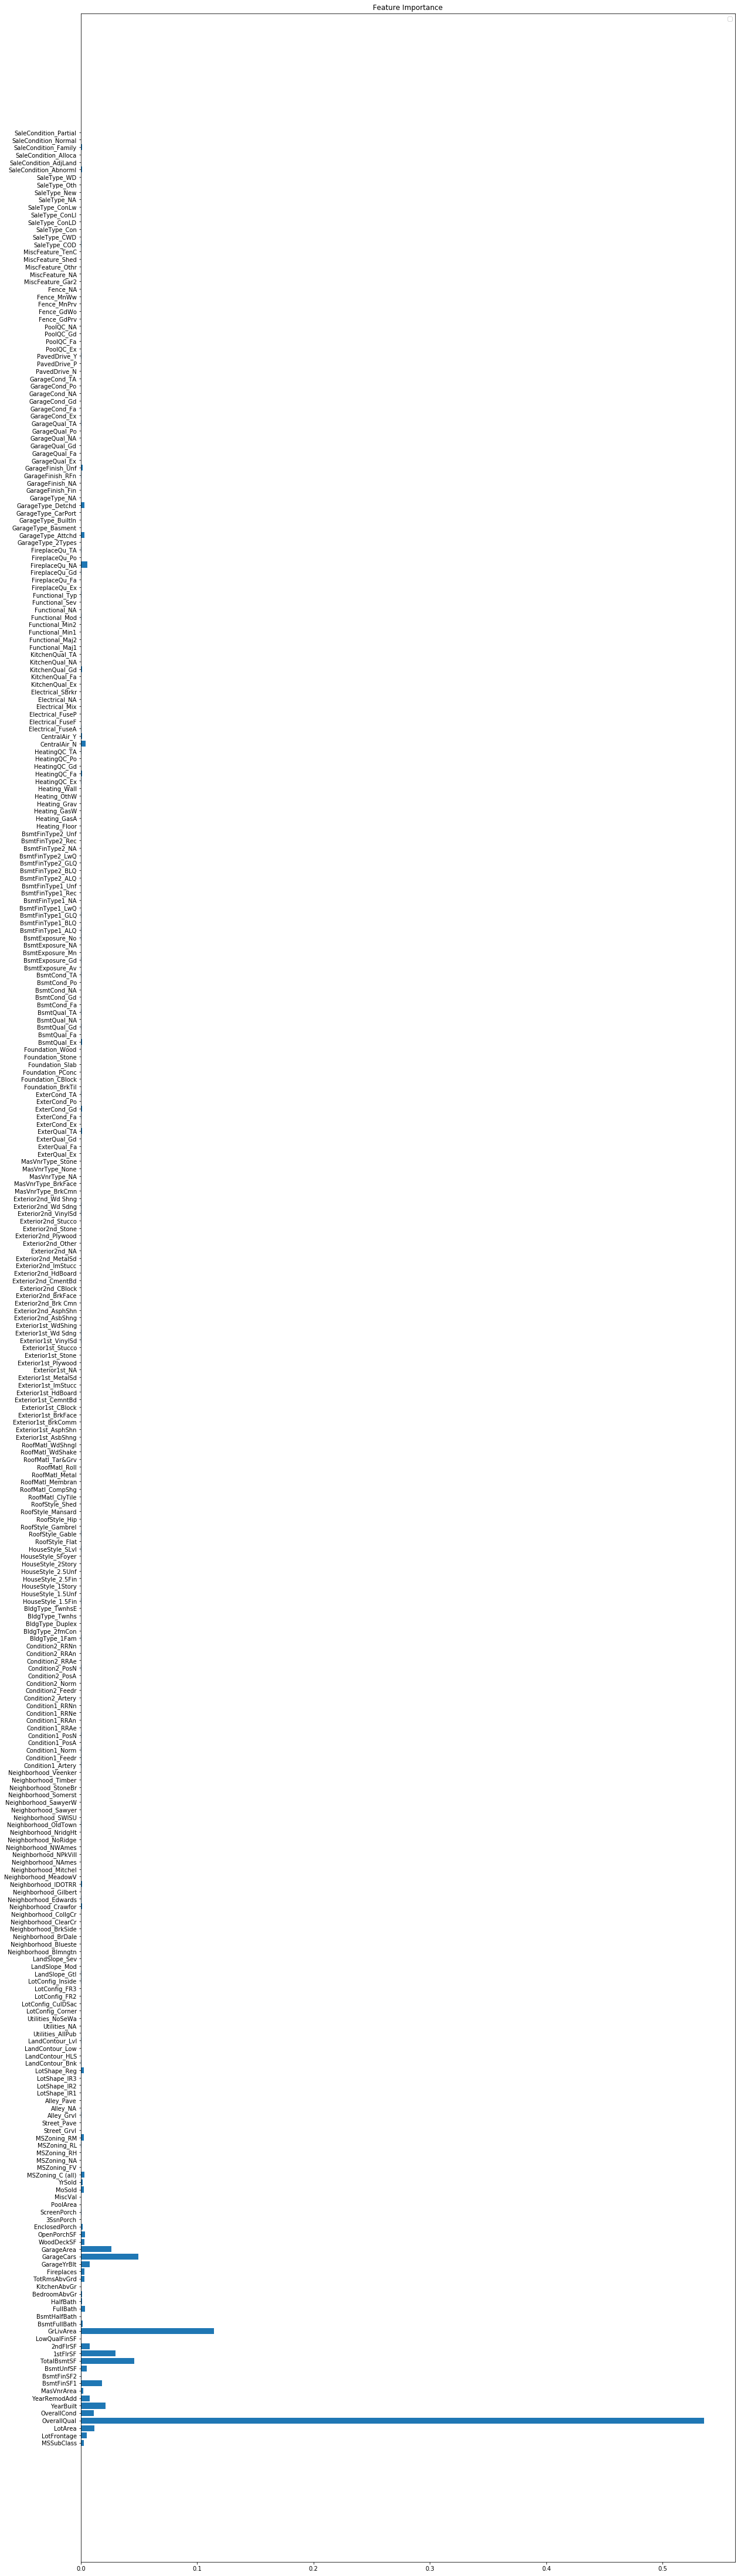

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)


#特徴量の重要度
feature = clf.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.ix[:, 'number']

#特徴量の名前
label = X_train.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print (str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

# plt.title('Feature Importance')

# plt.barh(range(len(feature)),feature[indices], color='lightblue', align='center')
# plt.xticks(range(len(feature)), label[indices], rotation=90)
# plt.xlim([-1, len(feature)])
# plt.tight_layout()
# plt.show()
from pylab import rcParams

rcParams['figure.figsize'] = 20,80

plt.title('Feature Importance')
plt.barh(label,feature)
plt.legend()
plt.show()

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


1   OverallQual   0.45171167498110903
2   TotalSF   0.3096849611251796
3   GrLivArea   0.014623859105916232
4   GarageCars   0.013767188642457255
5   YearBuilt   0.011348671358164116
6   BsmtFinSF1   0.011203321352872457
7   LotArea   0.010818793701540059
8   GarageArea   0.010808310339304222
9   CentralAir_Y   0.010578146134790224
10   YearRemodAdd   0.010327359815213504
11   OverallCond   0.009604806449719677
12   BsmtUnfSF   0.007054374512924355
13   1stFlrSF   0.006956877389106684
14   CentralAir_N   0.006951895616233045
15   GarageYrBlt   0.00644866800804473
16   2ndFlrSF   0.005193857807387087
17   TotalBsmtSF   0.004545039249277244
18   LotFrontage   0.0036364893832130565
19   MSZoning_C (all)   0.0036348531020047813
20   OpenPorchSF   0.0034944453641347294
21   GarageType_Detchd   0.0034586749196526267
22   MoSold   0.002935116918420502
23   BsmtQual_Ex   0.0029342966015079874
24   WoodDeckSF   0.0026379537336475704
25   MSZoning_RM   0.0026013016325765067
26   Fireplaces   0.0

No handles with labels found to put in legend.


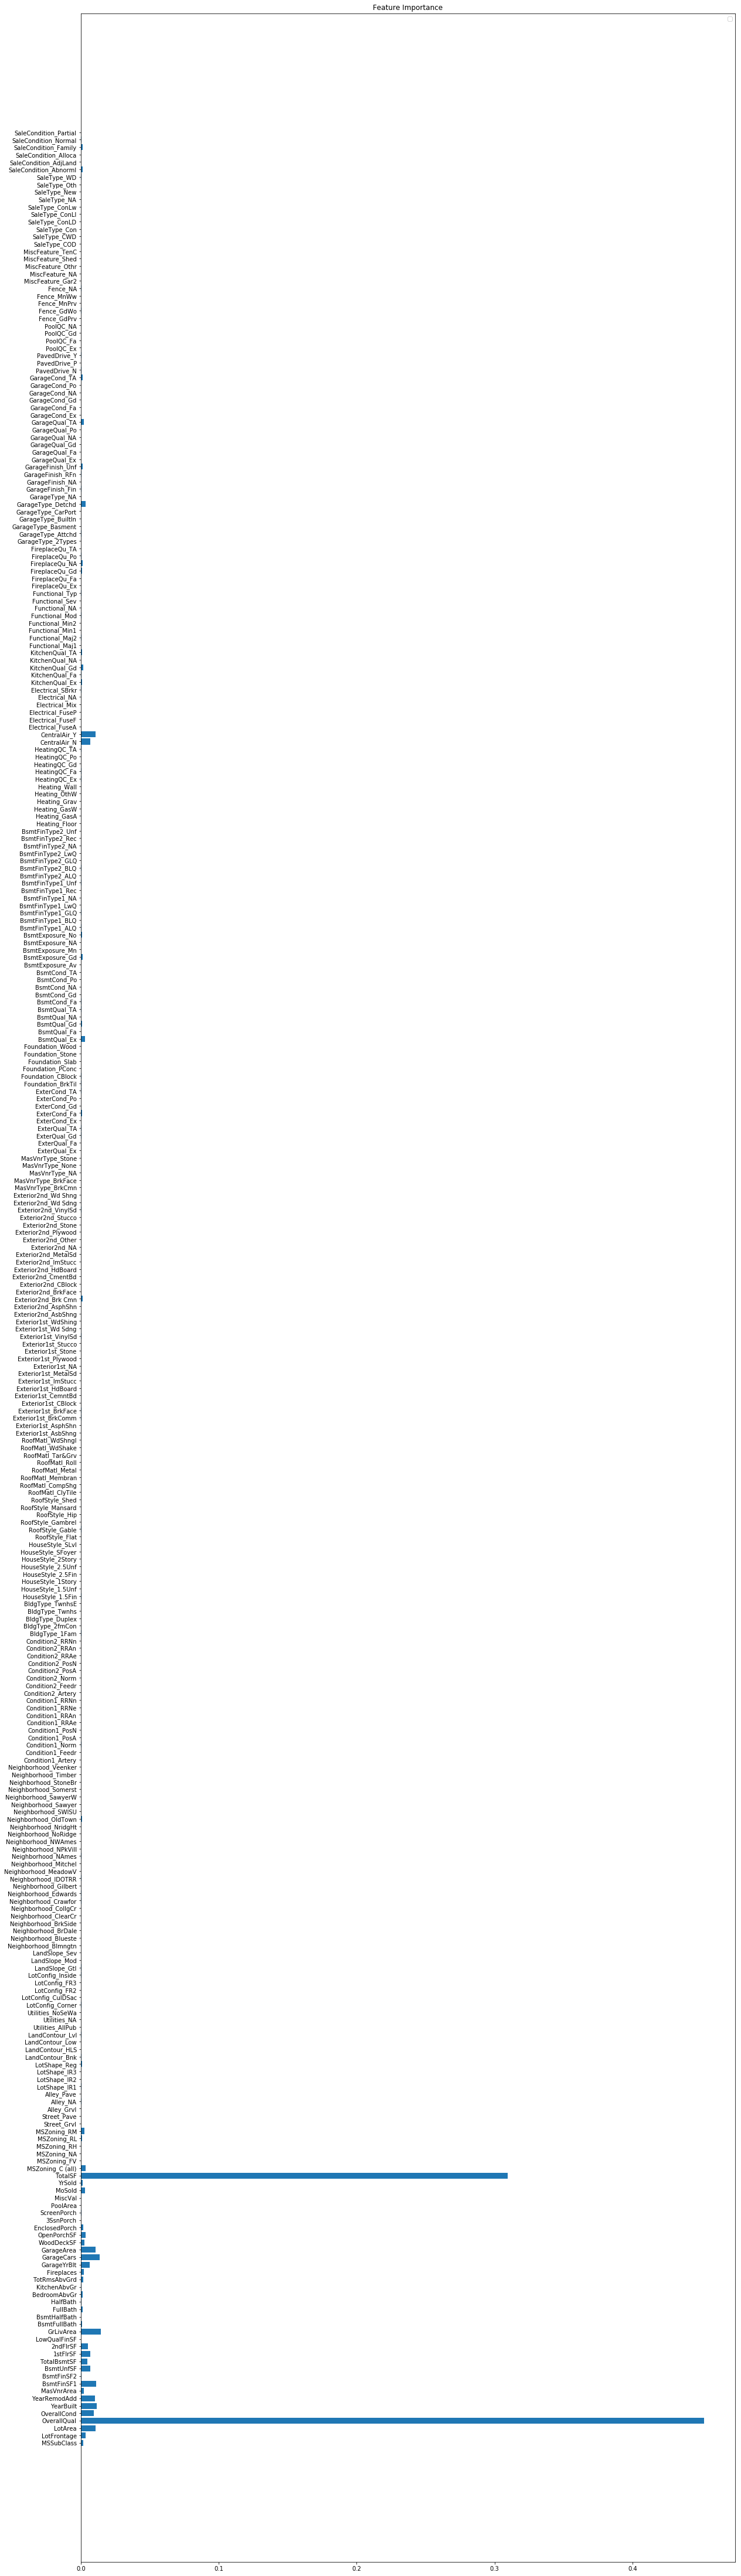

In [94]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)


#特徴量の重要度
feature = clf.feature_importances_

#特徴量の重要度を上から順に出力する
f = pd.DataFrame({'number': range(0, len(feature)),
             'feature': feature[:]})
f2 = f.sort_values('feature',ascending=False)
f3 = f2.ix[:, 'number']

#特徴量の名前
label = X_train.columns[0:]

#特徴量の重要度順（降順）
indices = np.argsort(feature)[::-1]

for i in range(len(feature)):
    print (str(i + 1) + "   " + str(label[indices[i]]) + "   " + str(feature[indices[i]]))

# plt.title('Feature Importance')

# plt.barh(range(len(feature)),feature[indices], color='lightblue', align='center')
# plt.xticks(range(len(feature)), label[indices], rotation=90)
# plt.xlim([-1, len(feature)])
# plt.tight_layout()
# plt.show()
from pylab import rcParams

rcParams['figure.figsize'] = 20,80

plt.title('Feature Importance')
plt.barh(label,feature)
plt.legend()
plt.show()

In [67]:
Data = pd.concat([drop_train_df,test_df],axis=0)
Data.isnull().sum()[Data.isnull().sum()!=0]
# data_dummies1 = pd.get_dummies(Data)
# transdropData1 = pd.concat([Data,data_dummies1],axis=1)
# transdropData1.isnull().sum()[transdropData1.isnull().sum()!=0]
# transdropData1["GarageType_Detchd"].isnull().sum()

##LotFrontage(486),BsmtFinSF1(1),BsmtUnfSF(1),TotalBsmtSF(1),GarageYrBlt(159),GarageCars(1),GarageArea(1)

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64

In [59]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'TotalSF', 'MSZoning_C (all)', 'CentralAir_N',
       'CentralAir_Y', 'GarageType_Detchd'],
      dtype='object')

In [101]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
select = SelectFromModel(RandomForestRegressor(n_estimators=100,random_state=0),max_features=52)
select.fit(X_train,y_train)
X_train_select = select.transform(X_train)
X_test_select = select.transform(X_test)
print(X_train_select.shape)
print(X_test_select.shape)

(1460, 21)
(1459, 21)


Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'OpenPorchSF', 'TotalSF', 'MSZoning_C (all)', 'CentralAir_N',
       'CentralAir_Y', 'GarageType_Detchd'],
      dtype='object')

In [35]:

# from sklearn.ensemble import RandomForestRegressor
from datetime import datetime
time= datetime.now().strftime("%Y%m%d-%H%M%S")
time
import xgboost as xgb
model = xgb.XGBRegressor(max_depth=3,learning_rate=0.1,colsample_bytree =0.6)

model.fit(X_train,y_train)
predictions = np.exp(model.predict(X_test))

df_result = pd.DataFrame()
df_result['Id'] = test_df['Id']
df_result['SalePrice'] = predictions
df_result.to_csv('result.csv'+time,index=False)
df_result

/Users/hayatoyamaguchi/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


,Id,SalePrice
0,1461,127231.945312
1,1462,164451.062500
2,1463,184231.968750
3,1464,189627.843750
4,1465,187594.562500
5,1466,168702.890625
6,1467,176242.406250
7,1468,165109.828125
8,1469,185569.640625
9,1470,119896.320312
